# 哈密顿量
对于一个物理系统，可以用哈密顿量来进行描述。根据哈密顿量可以求得本征值与本征能量。

对于一个经典问题，我们也可写出它的哈密顿量，通过对哈密顿量的处理来达到求解的效果

## 泡利算符类
$\sigma_z= \begin{pmatrix}1 & 0 \\ 0 & -1 \end{pmatrix}$

本征态$\left | 0  \right \rangle $对应本征值1 本征态$\left | 1  \right \rangle $对应本征值-1

泡利Z可以表示简单布尔系统的哈密顿量形式

最基本的哈密顿量形式：

a处于$\left | 0  \right \rangle $态，其哈密顿量表示为$\begin{pmatrix}1 & 0 \\ 0 & 0 \end{pmatrix}$，推导$(I+\sigma_z)/2$

非a处于$\left | 1  \right \rangle $态，其哈密顿量表示为$\begin{pmatrix}0 & 0 \\ 0 & 1 \end{pmatrix}$，推导$(I-\sigma_z)/2$

## 哈密顿量表示 以两节点的maxcut为例子

maxcut问题就是对于一个有节点有边的图，分为两组，找到分组连线最多的解决方案

其经典表示可以写为最大化一个函数$C(x)=\sum_{<i,j>}\omega_{i,j}x_i(1-x_j)$

x只有0,1两个值

以一个Qbit串来代表各个节点的分组情况，在上面的式子中，分在不同组后半截为1，相同组为0

尝试写出这个问题的哈密顿量：

以泡利z矩阵特征值1，-1来进行一些变化：此时$x_i,x_j$为1或-1

$C(x)=\sum_{<i,j>}\omega_{i,j}[x_i(1-x_j)+x_j(1-x_i)]/2$依旧满足同组为0，异组为1

此时$H=\sum_{<i,j>}C(x)\left | x  \right \rangle \left \langle x\right | $

$H=\sum(I-\sigma_z^i\sigma_z^j)/2$

量子近似优化算法就是将问题从经典的问题转化为在制备一个量子态使其期望最小（最大）化的问题

## 期望值的求法

量子近似优化算法要求我们求出期望值，因此怎么求出期望值就非常关键。

目前似乎在这个领域上也有很多文章。

经典的QAOA算法是每次优化前都需要在量子计算机上跑，计算期望值，但量子计算的成本比较大，所以有人也在探索在经典计算机上求期望的方法，部分依赖于对于图的处理方法。

一般来说，对于期望值的求解，我们要通过实验知道概率分布，对于每一组测量，我们通过这一组测量中各个态的频率乘对应的期望，一般来说，对于每一个小的态，期望可以由经典方法求得。得到总的期望作为优化函数。

但这样如果每次都要计算每一个比特串代表的态的哈密顿量，其实并没有减少计算的复杂度。

通过咨询了本源量子的工程师

具体的做法略微有一些不同，用频率代表概率，每一次测量（一个shot）,记录一个期望值，并存在字典中，以后碰到相同的就直接调用。最终一轮测试的期望值由每次shot的期望相加得到，这样只要shot的次数小于2^n次，就能体现出算法的优势。

但是经过另外一些资料的查找，发现实际量子计算中，每一次调用量子芯片计算的成本是比较高的，因此，有人提出使用经典的方法计算出哈密顿量的期望值，然后在经典计算机上进行优化，调整参数，最后再在量子计算机上通过shot解决，从而达到降低成本的目的。

具体的操作上

见到的方法有：1、通过解析的方法得到了H的经典表达式（p=1）,与具体的图有关，也运用到了图处理的一些方法

2.通过图处理的相关算法进行实现。

# 量子绝热近似

## 量子力学里的绝热近似
哈密顿量有初态$H^i$逐渐变化到末态$H^f$。绝热定理指出，如果开始时粒子处于H^i的第i个本征态，它将演化至H^f的第n个本征态。$^{[1]}$

在解决具体的问题时，我们希望得到终态哈密顿量的最小值(最大值），终态哈密顿量记录为$H_c$

但是直接处理$H_c$十分不容易，因此考虑一个好制备的$H_B$,通过绝热近似逐渐演化到$H_c$

设经过T时间演化到末态，此时含时哈密顿量可以写为$H(t)=(1-t/T)H_B+(t/T)H_c$

写出体系的含时薛定谔方程：

$i\hbar\frac{\partial}{\partial t}\left | \psi  \right \rangle = H(t) \left | \psi  \right \rangle $

将$\left | \psi  \right \rangle $移动到左边，两边同时对时间进行积分

可以得到：

$i\hbar(ln(\left | \psi(t_2)  \right \rangle)-ln(\left | \psi(t_1)  \right \rangle))=\int_{t_1}^{t_2}H(t)dt$

令$t_1=0,\hbar=1为常数$

可以推出：$\left | \psi(t)\right \rangle=e^{-iH_B(t-t^2/2T)}e^{-i(t^2/2T) H_c}\left | \psi(0)\right \rangle$

思考：几何相，贝瑞相:$\gamma_n(t)=H_bt-H_Bt^2/2T+H_ct^2/2T$

之后是否可在算法中引入此相位

## 量子近似优化算法

在之前的近似中，由于演化时间不确定，我们将整个流程分为很多步，每步都看作一个准静态的演化过程。

在整个算法中，我们可以考虑制备一个简单的初态，让其通过一步一步的演化逐渐演化到我们所需要的态上去（使\<Hc\>期望最大或最小的态上去）

那么，每一步的演化过程都可以看作是$e^{-i\beta H_B}e^{-i\gamma H_c}$

这个$H_B$为初态哈密顿量，对于初始均匀态，$H_B=\sum_{i=0}^{N-1}\sigma_i^x$

$e^{-i\beta H_B}=\Pi_{n=0}^{N-1}e^{-i\sigma_n^x}\beta _i=\Pi_{n=0}^{N-1}RX(n,2\beta_i)$

在量子线路中对应一组RX门的操作

对于$e^{-i\gamma H_c}$经过推导可转化为一组$CNOT(j,k)RZ(k,-\gamma_i)CNOT(j,k)$操作

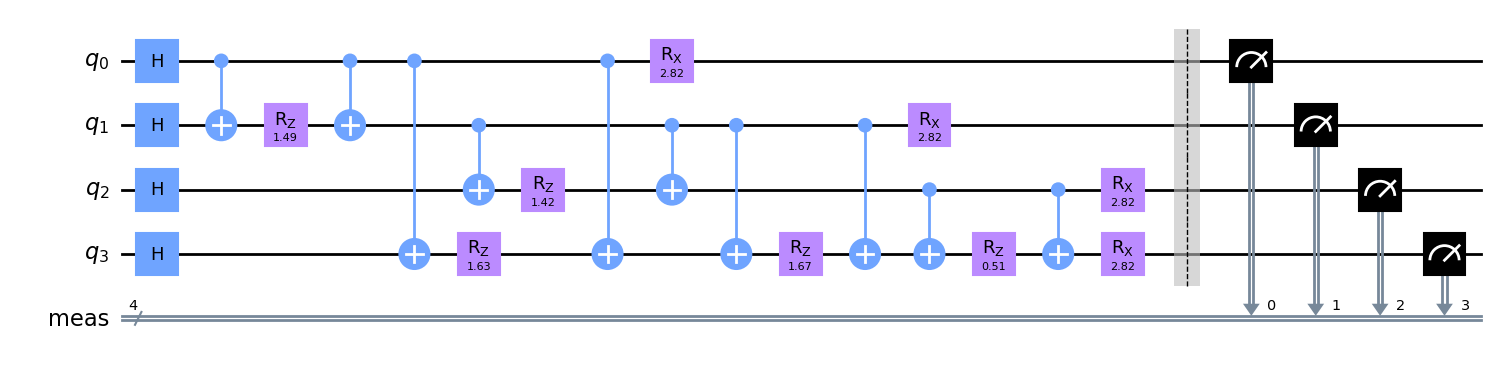

## 具体的优化算法整理

### TPE 优化方法 （封装于optuna库）

Tree-structured Parzen Estimator Approach 

基于序列模型的全局优化(SMBO)算法。

经常用于机器学习具体参数的调节。机器学习中超参数调节非常麻烦，找到最优的参数很不容易。

使用图结构来描述

具体的数学还待仔细研究。

### COBYLA方法（封装于scipy）

被称作线性逼近的约束优化

该算法通过n维n+1点的单纯形构造目标函数和约束的连续线性逼近，并在每一步的信赖区域中优化这些逼近。

### SLSQP方法（封装于scipy）

有约束的多元函数问题，序列最小二乘法，通过求解满足约束条件的代价函数的二阶局部逼近来确定局部搜索方向

# 总结